In [ ]:
#https://github.com/gadgil-devashri/csp-map-coloring

pip install geopandas

Choose map: 
1. Australia 
2. USA
1
Select if you want to run with Heuristics / without heursitics: 
1 for without heuristic 
2 for with heuristic
2
Select 
1 for Depth first search only  
2 for Depth first search + forward checking 
3 for Depth first search + forward checking + propagation through singleton domains
2
Minimum no of colors required for Australia map:  3
{'Western Australia': 'B', 'Northern Territory': 'G', 'South Australia': 'R', 'Queensland': 'B', 'New South Wales': 'G', 'Victoria': 'B', 'Tasmania': 'R'}
No. of Backtracks:  0
Elapsed Time: 5.079ms
Ready to plot map for USA
Ready to plot map for AUS


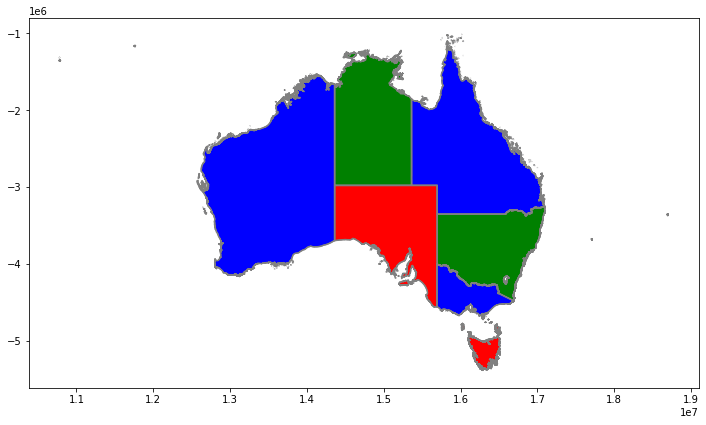

In [29]:
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
from datetime import datetime

states_australia = ['Western Australia', 'Northern Territory', 'South Australia', 'Queensland', 'New South Wales', 'Victoria', 'Tasmania']

neighbours_australia = {
    'Western Australia' : ['Northern Territory', 'South Australia'],
    'Northern Territory' : ['Western Australia', 'South Australia', 'Queensland'],
    'South Australia' : ['Western Australia', 'Northern Territory', 'Queensland', 'New South Wales', 'Victoria'],
    'Queensland' : ['Northern Territory', 'South Australia', 'New South Wales'],
    'New South Wales' : ['Queensland', 'Victoria', 'South Australia'],
    'Victoria' : ['New South Wales', 'South Australia'],
    'Tasmania' : []  
}

states_usa = [
    'Alabama','Alaska','Arkansas','Arizona',
    'California','Colorado','Connecticut',
    'Delaware','Florida',
    'Georgia',
    'Hawaii',
    'Iowa','Idaho','Illinois','Indiana',
    'Kansas','Kentucky',
    'Louisiana',
    'Massachusetts','Maryland','Maine','Michigan','Minnesota','Missouri','Mississippi','Montana',
    'North Carolina','North Dakota','Nebraska','New Hampshire','New Jersey','New Mexico','Nevada','New York',
    'Ohio','Oklahoma','Oregon',
    'Pennsylvania',
    'Rhode Island',
    'South Carolina','South Dakota',
    'Tennessee','Texas',
    'Utah',
    'Virginia','Vermont',
    'Washington','Wisconsin','West Virginia','Wyoming'
    ]

neighbours_usa = {
    'Alabama' : ['Florida' , 'Georgia' , 'Mississippi' , 'Tennessee'],
    'Alaska' : [],
    'Arkansas' : ['Louisiana' , 'Missouri' , 'Mississippi' , 'Oklahoma' , 'Tennessee' , 'Texas'],
    'Arizona' : ['California' , 'Colorado' , 'New Mexico' , 'Nevada' , 'Utah'],
    'California' : ['Arizona' , 'Nevada' , 'Oregon'],
    'Colorado' : ['Arizona' , 'Kansas' , 'Nebraska' , 'New Mexico' , 'Oklahoma' , 'Utah' , 'Wyoming'],
    'Connecticut' : ['Massachusetts' , 'New York' , 'Rhode Island'],
    'Delaware' : ['Maryland' , 'New Jersey' , 'Pennsylvania' ],
    'Florida' : ['Alabama' , 'Georgia' ],
    'Georgia' : ['Alabama' , 'Florida' , 'North Carolina' , 'South Carolina' , 'Tennessee' ],
    'Hawaii' : [ ],
    'Idaho' : ['Montana' , 'Nevada' , 'Oregon' , 'Utah' , 'Washington' , 'Wyoming' ],
    'Illinois' : ['Iowa' , 'Indiana' , 'Michigan', 'Kentucky' , 'Missouri' , 'Wisconsin' ],
    'Indiana' : ['Illinois' , 'Kentucky' , 'Missouri' , 'Ohio' ],
    'Iowa' : ['Illinois' , 'Minnesota' , 'Missouri' , 'Nebraska' , 'South Dakota' , 'Wisconsin' ],
    'Kansas' : ['Colorado' , 'Missouri' , 'Nebraska' , 'Oklahoma' ],
    'Kentucky' : ['Illinois' , 'Indiana' , 'Missouri' , 'Ohio' , 'Tennessee' , 'Virginia' , 'West Virginia' ],
    'Louisiana' : ['Arkansas' , 'Mississippi' , 'Texas' ],
    'Massachusetts' : ['Connecticut' , 'New Hampshire' , 'New York' , 'Rhode Island' , 'Vermont' ],
    'Maryland' : [ 'Delaware' , 'Pennsylvania' , 'Virginia' , 'West Virginia' ],
    'Maine' : ['New Hampshire' ],
    'Michigan' : ['Indiana' , 'Ohio' , 'Wisconsin','Minnesota','Illinois' ],
    'Minnesota' : ['Iowa' , 'North Dakota' ,'Michigan', 'South Dakota' , 'Wisconsin' ],
    'Missouri' : ['Arkansas' , 'Iowa' , 'Illinois' , 'Kansas' , 'Kentucky' , 'Nebraska' , 'Oklahoma' , 'Tennessee' ],
    'Mississippi' : ['Alabama' , 'Arkansas' , 'Louisiana' , 'Tennessee' ],
    'Montana' : ['Idaho' , 'North Dakota' , 'South Dakota' , 'Wyoming' ],
    'North Carolina' : ['Georgia' , 'South Carolina' , 'Tennessee' , 'Virginia' ],
    'North Dakota' : ['Minnesota' , 'Montana' , 'South Dakota' ],
    'Nebraska' : ['Colorado' , 'Iowa' , 'Kansas' , 'Missouri' , 'South Dakota' , 'Wyoming' ],
    'New Hampshire' : ['Massachusetts' , 'Maine' , 'Vermont' ],
    'New Jersey' : ['Delaware' , 'New York' , 'Pennsylvania' ],
    'New Mexico' : ['Arizona' , 'Colorado' , 'Oklahoma' , 'Texas' , 'Utah' ],
    'Nevada' : ['Arizona' , 'California' , 'Idaho' , 'Oregon' , 'Utah' ],
    'New York' : ['Connecticut' , 'Massachusetts' , 'New Jersey' , 'Pennsylvania' , 'Vermont', 'Rhode Island' ],
    'Ohio' : ['Indiana' , 'Kentucky' , 'Michigan' , 'Pennsylvania' , 'West Virginia' ],
    'Oklahoma' : ['Arkansas' , 'Colorado' , 'Kansas' , 'Missouri' , 'New Mexico' , 'Texas' ],
    'Oregon' : ['California' , 'Idaho' , 'Nevada' , 'Washington' ],
    'Pennsylvania' : ['Delaware' , 'Maryland' , 'New Jersey' , 'New York' , 'Ohio' , 'West Virginia' ],
    'Rhode Island' : ['Connecticut' , 'Massachusetts', 'New York' ],
    'South Carolina' : ['Georgia' , 'North Carolina' ],
    'South Dakota' : ['Iowa' , 'Minnesota' , 'Montana' , 'North Dakota' , 'Nebraska' , 'Wyoming' ],
    'Tennessee' : ['Alabama' , 'Arkansas' , 'Georgia' , 'Kentucky' , 'Missouri' , 'Mississippi' , 'North Carolina' , 'Virginia' ],
    'Texas' : ['Arkansas' , 'Louisiana' , 'New Mexico' , 'Oklahoma' ],
    'Utah' : ['Arizona' , 'Colorado' , 'Idaho' , 'New Mexico' , 'Nevada' , 'Wyoming' ],
    'Virginia' : [ 'Kentucky' , 'Maryland' , 'North Carolina' , 'Tennessee' , 'West Virginia' ],
    'Vermont' : ['Massachusetts' , 'New Hampshire' , 'New York' ],
    'Washington' : [ 'Idaho' , 'Oregon' ],
    'Wisconsin' : ['Iowa' , 'Illinois' , 'Michigan' , 'Minnesota' ],
    'West Virginia' : ['Kentucky' , 'Maryland' , 'Ohio' , 'Pennsylvania' , 'Virginia' ],
    'Wyoming' : ['Colorado' , 'Idaho' , 'Montana' , 'Nebraska' , 'South Dakota' , 'Utah' ]
}

noOfBacktracks = 0

#Function to inilialize assigned colors
def initColorDict(states):
    assignedColor = {}
    for state in states:
        assignedColor[state] = 'Nil'
    return assignedColor

#Function to initialize domain
def initDomain(states, noOfColors):
    domain = {}
    if noOfColors == 1:
        color = ['R']
    elif noOfColors == 2:
        color = ['R', 'G']
    elif noOfColors == 3:
        color = ['R', 'G', 'B']
    elif noOfColors == 4:
        color = ['R', 'G', 'B', 'Y']
    else:
        color = ['R', 'G', 'B', 'Y', 'P']
    for state in states:
        domain[state] = copy.deepcopy(color)
    return domain

def Backtrack(states, neighbours, colors, domain):
    global noOfBacktracks
    # Check if Successful
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    # Pick a state to color
    currentState = states[0]
    currentNeighbors = neighbours[currentState]
    occupiedColors = list( map(colors.get, currentNeighbors))
    for color in domain[currentState]:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            #Recusrively call the function
            output = Backtrack(states, neighbours, colors, domain)
            if output != "Failure":
                return "Success"
            colors[currentState] = 'Nil'
            # add currentState back since assignment failed
            states.append(currentState)
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"


def Forwardcheck(states, neighbours, colors, domain):
    global noOfBacktracks
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    currentState = states[0]
    #states.remove(currentState)
    currentNeighbors = neighbours[currentState]
    output = 'Success'
    occupiedColors = list( map(colors.get, currentNeighbors))
    if 'Nil' in occupiedColors:
        occupiedColors.remove('Nil')
    for color in domain[currentState]:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            # check if domain can be reduced
            result = check(color,currentNeighbors, colors)
            if not result:
                prevDomain = copy.deepcopy(domain)
                # Reduce domain
                reduceDomain(color, currentNeighbors, colors)
                output = Forwardcheck(states, neighbours, colors, domain)
                if output != "Failure":
                    return "Success"
                # Restore the domain
                domain = prevDomain
            colors[currentState] = 'Nil'
            # Add the state back since it was a failed assignment
            states.append(currentState)
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"

def ForwardcheckWithSingletonPropogation(states, neighbours, colors, domain):
    global noOfBacktracks
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    currentState = states[0]
    #states.remove(currentState)
    currentNeighbors = neighbours[currentState]
    output = 'Success'
    occupiedColors = list( map(colors.get, currentNeighbors))
    if 'Nil' in occupiedColors:
        occupiedColors.remove('Nil')
    for color in domain[currentState]:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            # check if domain reduction can be applied
            result = check(color,currentNeighbors, colors)
            if not result:
                prevDomain = copy.deepcopy(domain)
                # Reduce the domain
                reduceDomain(color, currentNeighbors, colors)
                # Check if singleton propogation can happen
                singleton = reduceSingletonDomain(currentNeighbors, neighbours, colors)
                if singleton:
                    output = ForwardcheckWithSingletonPropogation(states, neighbours, colors, domain)
                    if output != "Failure":
                        return "Success"
                # Restore the domain
                domain = prevDomain
            colors[currentState] = 'Nil'
            # Add the state back since it was a failed assignment
            states.append(currentState)
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"

def reduceDomain(color, currentNeighbors, colors):
    for neighbor in currentNeighbors:
        if colors[neighbor] == 'Nil' and color in domain[neighbor]:
            domain[neighbor].remove(color)


def check(color, currentNeighbors, colors):
    for neighbor in currentNeighbors:
        if colors[neighbor] == 'Nil' and color in domain[neighbor]:
            if len(domain[neighbor]) == 1:
                return True
    return False
    
def reduceSingletonDomain(currentNeighbors, neighbors, colors):
    reduceStates = []
    for neighbor in currentNeighbors:
        if len(domain[neighbor]) == 1 and colors[neighbor] == 'Nil':
            reduceStates.append(neighbor)
    
    while reduceStates:
        state = reduceStates.pop(0)
        for neighbor in neighbors[state]:
            if colors[neighbor] == 'Nil' and domain[state][0] in domain[neighbor]:
                domain[neighbor].remove(domain[state][0])
                if len(domain[neighbor]) == 0:
                    return False
                if len(domain[neighbor]) == 1:
                    reduceStates.append(neighbor)
    return True

def minRemainingValueHeuristic(states, domain, neighbours):    
    states.sort(key=lambda x: (len(domain[x]),-len(neighbours[x])))
    currentSelection = states[0]
    return currentSelection

def leastConstrainingValueHeuristic(currentState, domain, neighbors):
    currentDomain = domain[currentState]
    currentNeighbors = neighbors[currentState]
    orderedDomain ={}
    for color in currentDomain:
        count = 0
        for neighbor in currentNeighbors:
            if color in domain[neighbor]:
                count = count + 1
        orderedDomain[color] = count
    
    # Sort 
    orderedDomain = dict(sorted(orderedDomain.items(), key=lambda item: item[1]))
    return list(orderedDomain.keys())

def BacktrackWithHeuristics(states, neighbours, colors, domain):
    global noOfBacktracks
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    # Use minimum heuristics( and degree heuristics ) to select next unassigned variable 
    currentState = minRemainingValueHeuristic(states, domain, neighbours)
    currentNeighbors = neighbours[currentState]
    occupiedColors = list( map(colors.get, currentNeighbors))
    # Use LCV heuristic to get the color
    orderedDomain = leastConstrainingValueHeuristic(currentState, domain, neighbours)
    for color in orderedDomain:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            output = BacktrackWithHeuristics(states, neighbours, colors, domain)
            if output != "Failure":
                return "Success"
            colors[currentState] = 'Nil'
            # add currentState back since assignment failed
            states.append(currentState)
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"

def ForwardcheckWithHeuristics(states, neighbours, colors, domain):
    global noOfBacktracks
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    # Use minimum heuristics( and degree heuristics ) to select next unassigned variable 
    currentState = minRemainingValueHeuristic(states, domain, neighbours)
    currentNeighbors = neighbours[currentState]
    output = 'Success'
    occupiedColors = list( map(colors.get, currentNeighbors))
    if 'Nil' in occupiedColors:
        occupiedColors.remove('Nil')
    # Use LCV heuristic to get the color
    orderedDomain = leastConstrainingValueHeuristic(currentState, domain, neighbours)
    for color in orderedDomain:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            # check if any domain can be reduced
            result = check(color,currentNeighbors, colors)
            if not result:
                prevDomain = copy.deepcopy(domain)
                # Reduce domain
                reduceDomain(color, currentNeighbors, colors)
                output = ForwardcheckWithHeuristics(states, neighbours, colors, domain)
                if output != "Failure":
                    return "Success"
                # Restore domain
                domain = prevDomain
            colors[currentState] = 'Nil'
            # add currentState back since assignment failed
            states.append(currentState)         
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"

            
def ForwardcheckWithSingletonPropogationAndHeuristics(states, neighbours, colors, domain):
    global noOfBacktracks
    if all(value != 'Nil' for value in colors.values()):
        return "Success"
    # Use minimum heuristics( and degree heuristics ) to select next unassigned variable 
    currentState = minRemainingValueHeuristic(states, domain, neighbours)
    currentNeighbors = neighbours[currentState]
    output = 'Success'
    occupiedColors = list( map(colors.get, currentNeighbors))
    if 'Nil' in occupiedColors:
        occupiedColors.remove('Nil')
    # Use LCV heuristic to get the color
    orderedDomain = leastConstrainingValueHeuristic(currentState, domain, neighbours)
    for color in orderedDomain:
        if color not in occupiedColors:
            # assign consistent color
            colors[currentState] = color
            # Temporarily remove currentState
            states.remove(currentState)
            # check if any domain can be reduced
            result = check(color,currentNeighbors, colors)
            if not result:
                prevDomain = copy.deepcopy(domain)
                # Reduce domain
                reduceDomain(color, currentNeighbors, colors)
                # Aplly singleton propogation
                singleton = reduceSingletonDomain(currentNeighbors, neighbours, colors)
                if singleton:
                    output = ForwardcheckWithSingletonPropogationAndHeuristics(states, neighbours, colors, domain)
                    if output != "Failure":
                        return "Success"
                # Rsstore domain if filure occurs
                domain = prevDomain
            colors[currentState] = 'Nil'
            # add currentState back since assignment failed
            states.append(currentState)
    if colors[currentState] == 'Nil':
        noOfBacktracks = noOfBacktracks + 1
        return "Failure"

#Function to get the minimum chromatic number of the map
def getChromaticNumber(states, neighbors):
    copyStates = copy.deepcopy(states)
    count = 0
    while 1:
        count = count + 1
        copyStates = copy.deepcopy(states)
        colors = initColorDict(states)
        domain = initDomain(states, count)
        result = Backtrack(copyStates, neighbors, colors, domain)
        if result == 'Success':
            break
    return count                   

def checkConstraint(state, neighbors, color, colors): 
        for neighbor in neighbors[state]:
            if colors[neighbor] == color: 
                return False
        return True

# Function to get elapsed time for a particular run
def showTime():
    endTime = datetime.now()
    elapsedTime = (endTime - startTime).microseconds / 1000
    print("Elapsed Time: %sms" % (str(elapsedTime)))

#Function to color the given map
def plotMap(country,colors):
    # url of our shape file - USA 
    print("Ready to plot map for USA")
    if country == 'USA':
        path="C:/code/states_21basic/"
        # # load the shape file using geopandas
        states = geopandas.read_file(path+'states.shp')
        states = states.to_crs("EPSG:3395")
        ax2 = states.boundary.plot(figsize=(12,12), edgecolor=u'gray')
        if colors is not None:
            for k,v in colors.items():
                if v == 'R':
                    states[states.STATE_NAME == k].plot(edgecolor=u'gray', color='red',ax=ax2)
                elif v == 'B':
                    states[states.STATE_NAME == k].plot(edgecolor=u'gray', color='blue',ax=ax2)
                elif v == 'G':
                    states[states.STATE_NAME == k].plot(edgecolor=u'gray', color='green',ax=ax2)
                else :
                    states[states.STATE_NAME == k].plot(edgecolor=u'gray', color='yellow',ax=ax2)

            plt.show()
    else :
        print("Ready to plot map for AUS")
        path="C:/code/aus_basic/"
        # # load the shape file using geopandas
        states = geopandas.read_file('STE_2016_AUST.shp')
        states = states.to_crs("EPSG:3395")
        ax2 = states.boundary.plot(figsize=(12,12), edgecolor=u'gray')
        if colors is not None:
            for k,v in colors.items():
                if v == 'R':
                    states[states.STE_NAME16 == k].plot(edgecolor=u'gray', color='red',ax=ax2)
                elif v == 'B':
                    states[states.STE_NAME16 == k].plot(edgecolor=u'gray', color='blue',ax=ax2)
                elif v == 'G':
                    states[states.STE_NAME16 == k].plot(edgecolor=u'gray', color='green',ax=ax2)
                else :
                    states[states.STE_NAME16 == k].plot(edgecolor=u'gray', color='yellow',ax=ax2)

            plt.show()


print("Choose map: \n1. Australia \n2. USA")
mapChoice = int(input())
print("Select if you want to run with Heuristics / without heursitics: \n1 for without heuristic \n2 for with heuristic")
runWithHeuristic = int(input())
print("Select \n1 for Depth first search only  \n2 for Depth first search + forward checking \n3 for Depth first search + forward checking + propagation through singleton domains")
algorithm = int(input())
startTime = datetime.now()
if(mapChoice == 1):
    states = copy.deepcopy(states_australia)
    neighbours = neighbours_australia
    min_number = getChromaticNumber(states, neighbours)
    print("Minimum no of colors required for Australia map: ", min_number)
    if(runWithHeuristic==1):
        if(algorithm == 1):
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            noOfBacktracks = 0
            result = Backtrack(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        elif(algorithm == 2):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = Forwardcheck(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        else:
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithSingletonPropogation(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
    else:
        if(algorithm == 1):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = BacktrackWithHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        elif(algorithm == 2):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        else:
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithSingletonPropogationAndHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('AUS',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
elif(mapChoice == 2):
    states = copy.deepcopy(states_usa)
    neighbours = neighbours_usa
    min_number = getChromaticNumber(states, neighbours)
    print("Minimum no of colors required for USA map: ", min_number)
    if(runWithHeuristic==1):
        if(algorithm == 1):
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            noOfBacktracks = 0
            result = Backtrack(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                
        elif(algorithm == 2):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = Forwardcheck(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print(colors)
                showTime()
                print("No. of Backtracks: ", noOfBacktracks)
        else:
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithSingletonPropogation(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
    else:
        if(algorithm == 1):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = BacktrackWithHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        elif(algorithm == 2):
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
        else:
            noOfBacktracks = 0
            colors = initColorDict(states)
            domain = initDomain(states, min_number)
            result = ForwardcheckWithSingletonPropogationAndHeuristics(states, neighbours, colors, domain)
            if result == 'Success':
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
                plotMap('USA',colors)
            else:
                print("Failure")
                print(colors)
                print("No. of Backtracks: ", noOfBacktracks)
                showTime()
else:
    print("Choose correct map.")
    exit()

In [27]:
import plotly.express as px

# Do not modify the line below.
countries = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Falkland Islands", "Guyana", "Paraguay",
             "Peru", "Suriname", "Uruguay", "Venezuela"]

# Do not modify the line below.
colors = ["blue", "green", "red", "yellow"]

# Write your code here

graph = { "Argentina": ["Bolivia", "Brazil", "Chile", "Paraguay", "Uruguay"],
    "Bolivia": ["Argentina", "Brazil", "Chile", "Paraguay", "Peru"],
    "Brazil": ["Argentina", "Bolivia", "Colombia", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Chile": ["Argentina", "Bolivia", "Peru"],
    "Colombia": ["Brazil", "Ecuador", "Peru", "Venezuela"],
    "Ecuador": ["Colombia", "Bolivia", "Peru"],
    "Falkland Islands": [],
    "Guyana": ["Brazil", "Suriname", "Venezuela"],
    "Paraguay": ["Argentina", "Bolivia", "Brazil"],
    "Peru": ["Bolivia", "Brazil", "Chile", "Colombia", "Ecuador"],
    "Suriname": ["Brazil", "Guyana"],
    "Uruguay": ["Argentina", "Brazil"],
    "Venezuela": ["Brazil", "Colombia", "Guyana"] }


def sortCountriesByNeighbors():

    tmpCountries = {}

    for country in countries:
        tmpCountries.update({country: len(graph[country])})
    tmpCountries = list(sorted(tmpCountries.items(), key=lambda kv: kv[1]))
    countries.clear()

    i = len(tmpCountries) - 1

    while i > -1:
        countries.append(tmpCountries[i][0])
        i -= 1


def isColorCorrect(coloredMap):

    for node in graph:
        edges = (graph[node])
        colorOfNode = coloredMap[node]

        for edge in edges:
            colorOfEdge = coloredMap[edge]

            if colorOfNode == colorOfEdge:
                return False

    return True


def coloringMap():

    color_index = 0
    country_index = 0
    counter = 0
    ret = True

    while country_index < len(countries):

        if counter == len(colors):
            print("Unsolved Problem")
            ret = False
            break
        before = country_index
        clrMap.update({countries[country_index]: colors[color_index]})
        if not isColorCorrect(clrMap):
            country_index -= 1
        if color_index < 3:
            color_index += 1
        else:
            color_index = 0
        country_index += 1
        if before == country_index:
            counter += 1
        else:
            counter = 0

    return ret


# Do not modify this method, only call it with an appropriate argument.
# colormap should be a dictionary having countries as keys and colors as values.


def plot_choropleth(colormap):
    fig = px.choropleth(locationmode="country names",
                        locations=countries,
                        color=countries,
                        color_discrete_sequence=[colormap[c] for c in countries],
                        scope="south america")
    fig.show()


# Implement main to call necessary functions
if __name__ == "__main__":
    # coloring test
    colormap_test = {"Argentina": "blue", "Bolivia": "red", "Brazil": "yellow", "Chile": "yellow", "Colombia": "red",
                     "Ecuador": "yellow", "Falkland Islands": "yellow", "Guyana": "red", "Paraguay": "green",
                     "Peru": "green", "Suriname": "green", "Uruguay": "red", "Venezuela": "green"}

    if isColorCorrect(colormap_test):
        print("colormap_test is RIGHT colored.")

    else:
        print("colormap_test is FALSE colored.")

    sortCountriesByNeighbors()
    clrMap = {}

    for i in range(len(countries)):
        clrMap.update({countries[i]: f"emptyColor{i}"})

    if coloringMap():
        print("clrMap is RIGHT colored.")
        plot_choropleth(colormap=clrMap)
    else:
        print("clrMap is FALSE colored.")

colormap_test is RIGHT colored.
clrMap is RIGHT colored.
